In [1]:
conda install pytorch pytorch-cuda=11.7 -c pytorch -c nvidia

done
Solving environment: unsuccessful initial attempt using frozen solve. Retrying with flexible solve.
Solving environment: - ^C
unsuccessful attempt using repodata from current_repodata.json, retrying with next repodata source.

CondaError: KeyboardInterrupt


Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install simpletransformers

  Obtaining dependency information for simpletransformers from https://files.pythonhosted.org/packages/16/c8/20d7eede93e320c0746c01d2205bdbeb388c236247244b9428e743a96de9/simpletransformers-0.64.3-py3-none-any.whl.metadata
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.3/42.3 kB 2.2 MB/s eta 0:00:00
  Obtaining dependency information for regex from https://files.pythonhosted.org/packages/d1/df/460ca6171a8494fcf37af43f52f6fac23e38784bb4a26563f6fa01ef6faf/regex-2023.8.8-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 40.9/40.9 kB 8.8 MB/s eta 0:00:00
  Obtaining dependency information for transformers>=4.31.0 from https://files.pythonhosted.org/packages/98/46/f6a79f944d5c7763a9bc13b2aa6ac72daf43a6551f5fb03bccf0a9c2fec1/transformers-4.33.3-py3-none-any.whl.metadata
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 119.9/119.9 kB 5.8 MB/s eta 0:00:00
  Obtaining dependency information for datasets from https://files.pythonhosted

In [5]:
pip install torch torchvision torchaudio

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 619.9/619.9 MB 2.1 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.0/6.0 MB 110.0 MB/s eta 0:00:0000:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.4/4.4 MB 109.5 MB/s eta 0:00:0000:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.7/5.7 MB 111.6 MB/s eta 0:00:0000:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.0/21.0 MB 75.6 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 849.3/849.3 kB 80.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.8/11.8 MB 101.1 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 557.1/557.1 MB 1.9 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 317.1/317.1 MB 4.8 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 168.4/168.4 MB 9.4 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.6/54.6 MB 30.3 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━

In [6]:
import pandas as pd
import numpy as np
import os
import json
import seaborn as sns
import matplotlib.pyplot as plt
import torch

from simpletransformers.classification import ClassificationModel, ClassificationArgs
from sklearn.metrics import classification_report, confusion_matrix


In [7]:
import pandas as pd
import re
import string

def remove_emojis(text):
    return ''.join(char for char in text if char in (string.ascii_letters + string.digits + string.punctuation + ' '))

def remove_tags(text):
    return re.sub(r'@\w+', '', text)

def remove_multispace(text):
    return re.sub(r'[\s]+|[\t]|[.,"\']', ' ', text)

def preprocess_pipeline(text):

    text = remove_emojis(text)
    text = remove_tags(text)
    text = remove_multispace(text)

    return text

In [8]:
olid = pd.read_csv('data/olid-train-small.csv')
olid['text'] = olid['text'].apply(preprocess_pipeline)

hasoc = pd.read_csv('data/hasoc-train.csv')
hasoc['text'] = hasoc['text'].apply(preprocess_pipeline)

test_data = pd.read_csv('data/olid-test.csv')
test_data['text'] = test_data['text'].apply(preprocess_pipeline)

In [11]:
model_args = ClassificationArgs()
model_args.train_batch_size = 34
model_args.num_train_epochs = 15
model_args.overwrite_output_dir = True
model_args.learning_rate = 1e-5
model_args.use_multiprocessing=False
model_args.use_multiprocessing_for_evaluation=False


os.environ["TOKENIZERS_PARALLELISM"] = "false"





Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-cased and are newly initialized: ['classifier.weight', 'classifier.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [ ]:
model_bert = ClassificationModel('bert', 'bert-base-cased', args=model_args)

model_bert.train_model(olid[['text','labels']], output_dir='output/bert_olid')

predictions = model_bert.predict(test_data['text'].tolist())

print()
def results(predictions, true_labels, file_path):
    # metrics: precision, recall, f1-score
    metrics = classification_report(y_true=true_labels, y_pred=predictions)
    # confusion matrix
    cm = confusion_matrix(true_labels, predictions)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.title('Confusion Matrix')

    # Save the heatmap as an image
    plt.savefig(file_path + '_confusion_matrix.png')
    # Serialize and save the dictionary to a file
    with open(file_path + "metrics.json", "w") as file:
        json.dump(metrics, file)

    file.close()

results(predictions[0], test_data['labels'], file_path='results/bert_olid_results')

Epoch:   0%|          | 0/15 [00:00<?, ?it/s]

Running Epoch 0 of 15:   0%|          | 0/173 [00:00<?, ?it/s]

/opt/conda/lib/python3.10/site-packages/torch/optim/lr_scheduler.py:139: UserWarning: Detected call of `lr_scheduler.step()` before `optimizer.step()`. In PyTorch 1.1.0 and later, you should call them in the opposite order: `optimizer.step()` before `lr_scheduler.step()`.  Failure to do this will result in PyTorch skipping the first value of the learning rate schedule. See more details at https://pytorch.org/docs/stable/optim.html#how-to-adjust-learning-rate
  warnings.warn("Detected call of `lr_scheduler.step()` before `optimizer.step()`. "


Running Epoch 1 of 15:   0%|          | 0/173 [00:00<?, ?it/s]

Running Epoch 2 of 15:   0%|          | 0/173 [00:00<?, ?it/s]

Running Epoch 3 of 15:   0%|          | 0/173 [00:00<?, ?it/s]

Running Epoch 4 of 15:   0%|          | 0/173 [00:00<?, ?it/s]

Running Epoch 5 of 15:   0%|          | 0/173 [00:00<?, ?it/s]

Running Epoch 6 of 15:   0%|          | 0/173 [00:00<?, ?it/s]

Running Epoch 7 of 15:   0%|          | 0/173 [00:00<?, ?it/s]

Running Epoch 8 of 15:   0%|          | 0/173 [00:00<?, ?it/s]

Running Epoch 9 of 15:   0%|          | 0/173 [00:00<?, ?it/s]

Running Epoch 10 of 15:   0%|          | 0/173 [00:00<?, ?it/s]

Running Epoch 11 of 15:   0%|          | 0/173 [00:00<?, ?it/s]

Running Epoch 12 of 15:   0%|          | 0/173 [00:00<?, ?it/s]

Running Epoch 13 of 15:   0%|          | 0/173 [00:00<?, ?it/s]

Running Epoch 14 of 15:   0%|          | 0/173 [00:00<?, ?it/s]

  0%|          | 0/108 [00:00<?, ?it/s]

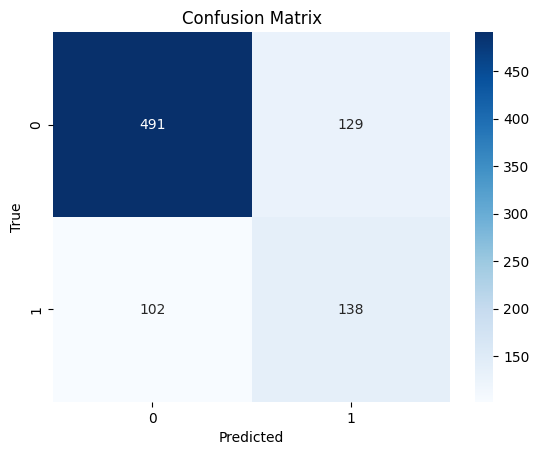

In [12]:
model_bert = ClassificationModel('bert', 'bert-base-cased', args=model_args)

model_bert.train_model(hasoc[['text','labels']], output_dir='output/bert_hasoc')

predictions = model_bert.predict(test_data['text'].tolist())

print()
def results(predictions, true_labels, file_path):
    # metrics: precision, recall, f1-score
    metrics = classification_report(y_true=true_labels, y_pred=predictions)
    # confusion matrix
    cm = confusion_matrix(true_labels, predictions)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.title('Confusion Matrix')

    # Save the heatmap as an image
    plt.savefig(file_path + '_confusion_matrix.png')
    # Serialize and save the dictionary to a file
    with open(file_path + "metrics.json", "w") as file:
        json.dump(metrics, file)

    file.close()

results(predictions[0], test_data['labels'], file_path='results/bert_hasoc_results')

# hatebert

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at GroNLP/hateBERT and are newly initialized: ['classifier.weight', 'classifier.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Epoch:   0%|          | 0/15 [00:00<?, ?it/s]

Running Epoch 0 of 15:   0%|          | 0/173 [00:00<?, ?it/s]

Running Epoch 1 of 15:   0%|          | 0/173 [00:00<?, ?it/s]

Running Epoch 2 of 15:   0%|          | 0/173 [00:00<?, ?it/s]

Running Epoch 3 of 15:   0%|          | 0/173 [00:00<?, ?it/s]

Running Epoch 4 of 15:   0%|          | 0/173 [00:00<?, ?it/s]

Running Epoch 5 of 15:   0%|          | 0/173 [00:00<?, ?it/s]

Running Epoch 6 of 15:   0%|          | 0/173 [00:00<?, ?it/s]

Running Epoch 7 of 15:   0%|          | 0/173 [00:00<?, ?it/s]

Running Epoch 8 of 15:   0%|          | 0/173 [00:00<?, ?it/s]

Running Epoch 9 of 15:   0%|          | 0/173 [00:00<?, ?it/s]

Running Epoch 10 of 15:   0%|          | 0/173 [00:00<?, ?it/s]

Running Epoch 11 of 15:   0%|          | 0/173 [00:00<?, ?it/s]

Running Epoch 12 of 15:   0%|          | 0/173 [00:00<?, ?it/s]

Running Epoch 13 of 15:   0%|          | 0/173 [00:00<?, ?it/s]

Running Epoch 14 of 15:   0%|          | 0/173 [00:00<?, ?it/s]

  0%|          | 0/108 [00:00<?, ?it/s]

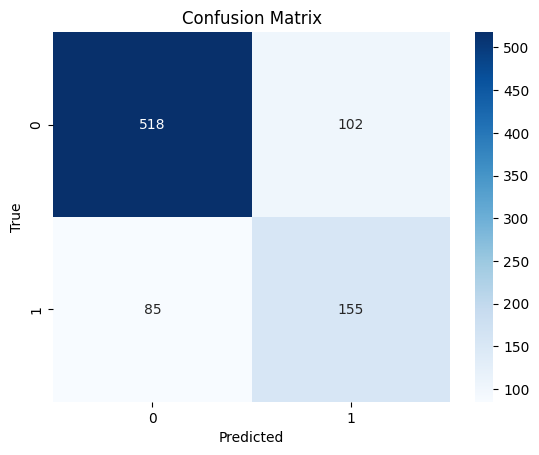

In [13]:
model_bert = ClassificationModel('bert', 'GroNLP/hateBERT', args=model_args)

model_bert.train_model(olid[['text','labels']], output_dir='output/hatebert_olid')

predictions = model_bert.predict(test_data['text'].tolist())

print()
def results(predictions, true_labels, file_path):
    # metrics: precision, recall, f1-score
    metrics = classification_report(y_true=true_labels, y_pred=predictions)
    # confusion matrix
    cm = confusion_matrix(true_labels, predictions)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.title('Confusion Matrix')

    # Save the heatmap as an image
    plt.savefig(file_path + '_confusion_matrix.png')
    # Serialize and save the dictionary to a file
    with open(file_path + "metrics.json", "w") as file:
        json.dump(metrics, file)

    file.close()

results(predictions[0], test_data['labels'], file_path='results/hatebert_olid_results')

In [ ]:
model_bert = ClassificationModel('bert', 'GroNLP/hateBERT', args=model_args)

model_bert.train_model(hasoc[['text','labels']], output_dir='output/hatebert_hasoc')

predictions = model_bert.predict(test_data['text'].tolist())

print()
def results(predictions, true_labels, file_path):
    # metrics: precision, recall, f1-score
    metrics = classification_report(y_true=true_labels, y_pred=predictions)
    # confusion matrix
    cm = confusion_matrix(true_labels, predictions)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.title('Confusion Matrix')

    # Save the heatmap as an image
    plt.savefig(file_path + '_confusion_matrix.png')
    # Serialize and save the dictionary to a file
    with open(file_path + "metrics.json", "w") as file:
        json.dump(metrics, file)

    file.close()

results(predictions[0], test_data['labels'], file_path='results/hatebert_hasoc_results')

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at GroNLP/hateBERT and are newly initialized: ['classifier.weight', 'classifier.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Epoch:   0%|          | 0/15 [00:00<?, ?it/s]

Running Epoch 0 of 15:   0%|          | 0/173 [00:00<?, ?it/s]

Running Epoch 1 of 15:   0%|          | 0/173 [00:00<?, ?it/s]

Running Epoch 2 of 15:   0%|          | 0/173 [00:00<?, ?it/s]

Running Epoch 3 of 15:   0%|          | 0/173 [00:00<?, ?it/s]

Running Epoch 4 of 15:   0%|          | 0/173 [00:00<?, ?it/s]

Running Epoch 5 of 15:   0%|          | 0/173 [00:00<?, ?it/s]

Running Epoch 6 of 15:   0%|          | 0/173 [00:00<?, ?it/s]

Running Epoch 7 of 15:   0%|          | 0/173 [00:00<?, ?it/s]

Running Epoch 8 of 15:   0%|          | 0/173 [00:00<?, ?it/s]

Running Epoch 9 of 15:   0%|          | 0/173 [00:00<?, ?it/s]

Running Epoch 10 of 15:   0%|          | 0/173 [00:00<?, ?it/s]

Running Epoch 11 of 15:   0%|          | 0/173 [00:00<?, ?it/s]

Running Epoch 12 of 15:   0%|          | 0/173 [00:00<?, ?it/s]

Running Epoch 13 of 15:   0%|          | 0/173 [00:00<?, ?it/s]

# fbert

In [ ]:
model_bert = ClassificationModel('bert', 'diptanu/fBERT', args=model_args)

model_bert.train_model(olid[['text','labels']], output_dir='output/fbert_olid')

predictions = model_bert.predict(test_data['text'].tolist())

print()
def results(predictions, true_labels, file_path):
    # metrics: precision, recall, f1-score
    metrics = classification_report(y_true=true_labels, y_pred=predictions)
    # confusion matrix
    cm = confusion_matrix(true_labels, predictions)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.title('Confusion Matrix')

    # Save the heatmap as an image
    plt.savefig(file_path + '_confusion_matrix.png')
    # Serialize and save the dictionary to a file
    with open(file_path + "metrics.json", "w") as file:
        json.dump(metrics, file)

    file.close()

results(predictions[0], test_data['labels'], file_path='results/fbert_olid_results')

In [ ]:
model_bert = ClassificationModel('bert', 'diptanu/fBERT', args=model_args)

model_bert.train_model(hasoc[['text','labels']], output_dir='output/fbert_hasoc')

predictions = model_bert.predict(test_data['text'].tolist())

print()
def results(predictions, true_labels, file_path):
    # metrics: precision, recall, f1-score
    metrics = classification_report(y_true=true_labels, y_pred=predictions)
    # confusion matrix
    cm = confusion_matrix(true_labels, predictions)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.title('Confusion Matrix')

    # Save the heatmap as an image
    plt.savefig(file_path + '_confusion_matrix.png')
    # Serialize and save the dictionary to a file
    with open(file_path + "metrics.json", "w") as file:
        json.dump(metrics, file)

    file.close()

results(predictions[0], test_data['labels'], file_path='results/fbert_hasoc_results')